**INTRODUCTION**

**This data is a UK based and registered store. It is a transnational dataset containing all transactions that took place between 2010 and 2011. The company mainly sells gifts for all occasions. Many of the company's customers are wholesalers.**

**Dataset;**

**http://archive.ics.uci.edu/dataset/352/online+retail**

**INFORMATION & FEATURES ABOUT THE DATASET**

**Understanding Customer Segment Dynamics through Data Analysis**

**The aim of this data analysis is to shed light on the evolving dynamics of customer segments. The dataset encompasses customer behaviors, product preferences, and trends over time within the business. Through the analysis of this data, we aim to identify distinct customer groups, popular products, and changes over time. The outcomes of this study could contribute to refining business strategies and making informed decisions.**

**This report presents the data analysis conducted to elucidate fundamental characteristics and shifting trends within the wholesale customer segment. It begins with an overview of the dataset's general structure and contents, followed by a focus on key findings such as customer segmentation and popular product analysis. The results could provide deeper insights for the enhancement and optimization of business strategies.**

**COLUMN INFORMATION:**

**``InvoiceNo:`` = Invoice number. A 6-digit integer uniquely assigned to each transaction. If this code starts with the letter 'c', it means cancel.<br>**
**``StockCode:`` = Product code. A 5-digit integer uniquely assigned to each different product.<br>**
**``Description:`` = Product name<br>**
**``Quantity:`` = Quantity of each product (item) per transaction. numerical data.<br>**
**``InvoiceDate:`` = Invoice Date and time. Numeric data, the day and time each transaction was created.<br>**
**``UnitPrice:`` = Unit price. Numerical data, product price per unit in pounds sterling.<br>**
**``CustomerID:`` = Customer number. A 5-digit integer assigned individually to each customer.<br>**
**``Country:`` = Country name. Name of the country of residence of each client.<br>**

*******************************************************************************************************************
*******************************************************************************************************************


**1. Import Libraries**

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

**2. Pulling The DataFrame**

In [172]:
df = pd.read_csv("Online_Retail.csv", encoding="ISO-8859-1")

In [173]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**3. Some Information To Generate Insights About The Dataset**

In [174]:
df.shape

(541909, 8)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [176]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**TASK 1: What is the total number of products sold and what is the average product price?**

In [177]:
# invoiceNo = "C" because it says sold products, that is, if there is a cancellation status, 
# we should not include it in the total.
# In addition, the unit price and quantity fields should not be negative.

In [178]:
filtered_df = df[~df["InvoiceNo"].str.startswith('C') & (df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [179]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [180]:
filtered_df["Quantity"].sum()

5588376

In [181]:
round(filtered_df["UnitPrice"].mean(),1)

3.9

In [182]:
# The total number of items sold in the data sale is 5.588.376 with an average item price of £3.9.

**TASK 2: What were the highest and lowest purchase prices?**

In [183]:
min_price = (filtered_df["Quantity"] * filtered_df["UnitPrice"]).min()
min_price

0.001

In [184]:
max_price = (filtered_df["Quantity"] * filtered_df["UnitPrice"]).max()
max_price

168469.6

In [185]:
# There are negative values in both columns, probably representing returns, so there cannot be a 
# negative unit price and negative sales. Therefore, I processed through filtered data.
# The lowest selling price is £0.001 and the highest selling price is £168469.6.

**TASK 3: What are the country names and the number of records for that country?**

In [186]:
df.groupby("Country")["CustomerID"].nunique().count()

38

In [187]:
df.groupby("Country")["CustomerID"].nunique().sum()

4380

In [188]:
# In total, there are 38 countries and 4380 unique customers.

In [189]:
df.groupby("Country")["CustomerID"].nunique().sort_values(ascending = False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [190]:
# Since the data belongs to a store in the UK, it is natural that there will be the most users in the UK.
# Since there are more than one customer with the same ID, I used nunique().

**TASK 4: Collect the preliminary information about the DF in a single item by defining a function.**

In [191]:
def df_info(df):
 
    row_count = df.shape[0]
    
    col_count = df.shape[1]
    
    col_names = df.columns.tolist()
    
    dtypes = df.dtypes
    
    desc = df.describe()
    
    inf = df.info()
    
    print("------------------------------------------------------------")
    print(f"Row Count: {row_count}")
    print("------------------------------------------------------------")
    print(f"Column Count: {col_count}")
    print("------------------------------------------------------------")
    print(f"Column Names: {col_names}")
    print("------------------------------------------------------------")
    print(f"Data Types:\n{dtypes}")
    print("------------------------------------------------------------")
    print(f"Summary Statistics:\n{desc}")
    print("------------------------------------------------------------")

df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
------------------------------------------------------------
Row Count: 541909
------------------------------------------------------------
Column Count: 8
------------------------------------------------------------
Column Names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
-----------------------------------------------------------

**TASK 5: Some of the data in the InvoiceNo column has the letter "C". What does this mean?**

In [192]:
df_c = df["InvoiceNo"].str.startswith('C')

In [193]:
df_c.value_counts()

False    532621
True       9288
Name: InvoiceNo, dtype: int64

In [194]:
# In the InvoiceNo column in the DataFrame, some numbers are preceded by the letter "C".
# This means that the order has been canceled and should not be included in transactions for questions about products sold.
# In total, 532,621 orders were delivered and 9,288 orders were canceled.

**TASK 6: What is the average number of products per customer?**

In [195]:
df.groupby("CustomerID")["Quantity"].mean().reset_index()

# Average quantity of products per customer.

,CustomerID,Quantity
0,12346.0,0.000000
1,12347.0,13.505495
2,12348.0,75.516129
3,12349.0,8.643836
4,12350.0,11.588235
...,...,...
4367,18280.0,4.500000
4368,18281.0,7.714286
4369,18282.0,7.538462
4370,18283.0,1.847884


In [196]:
df[df["CustomerID"] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [197]:
# For example, customer 12346 placed 2 orders and returned the same product. 
# Therefore, if I use the filtered data in this calculation, my data will be wrong 
# and the amount  paid by this customer will appear in my account as positive.

**TASK 7: Please specify the deadline for people to place an order.**

In [198]:
df["InvoiceDate2"] = pd.to_datetime(df["InvoiceDate"])

In [199]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [200]:
df.groupby("CustomerID")["InvoiceDate2"].max().reset_index()

# Last order date of each customer;

,CustomerID,InvoiceDate2
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-03-07 09:52:00
4368,18281.0,2011-06-12 10:53:00
4369,18282.0,2011-12-02 11:43:00
4370,18283.0,2011-12-06 12:02:00


**TASK 8: Calculate how many days have passed since the last order. Assign it to the column named "LastOrder".**

In [201]:
today = pd.to_datetime("today")  # today's date
today

Timestamp('2023-08-10 16:45:44.289485')

In [202]:
# df["LastOrder"] = (today- df["InvoiceDate2"]).dt.days  

# Normally, it should be processed by subtracting today's date, but since the dataset is old, 
# the last order date in the dataset was processed as today.

In [203]:
today2 = pd.to_datetime("2011-12-09 12:50:00")
today2

Timestamp('2011-12-09 12:50:00')

In [204]:
df["LastOrder"] = (today2- df["InvoiceDate2"]).dt.days  

In [205]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373


**TASK 9: Create a column called Total that shows the total amount of expenditure.**

In [206]:
df["TotalSpent"] = df["UnitPrice"] * df["Quantity"]

In [207]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34


**TASK 10: Show and visualize total spending by country.**

In [208]:
round((df.groupby("Country")["TotalSpent"].sum().sort_values(ascending = False).reset_index()),1)

,Country,TotalSpent
0,United Kingdom,8187806.4
1,Netherlands,284661.5
2,EIRE,263276.8
3,Germany,221698.2
4,France,197403.9
5,Australia,137077.3
6,Switzerland,56385.4
7,Spain,54774.6
8,Belgium,40911.0
9,Sweden,36595.9


In [209]:
# The country with the highest expenditure is the UK with £8,187,806 and the lowest is Saudi Arabia.

In [210]:
df_vis1 = round((df.groupby("Country")["TotalSpent"].sum().sort_values(ascending = False).reset_index()),1).head(5)

In [211]:
df_vis1

,Country,TotalSpent
0,United Kingdom,8187806.4
1,Netherlands,284661.5
2,EIRE,263276.8
3,Germany,221698.2
4,France,197403.9


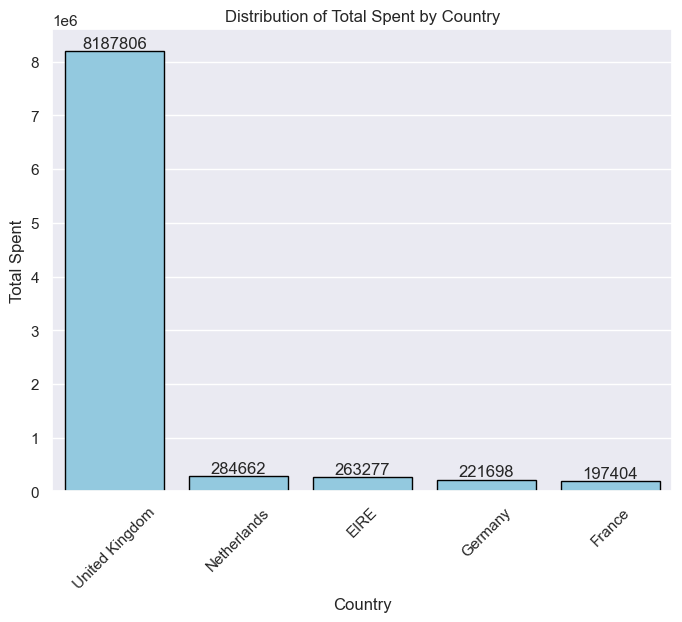

In [212]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x = "Country", y = "TotalSpent", data = df_vis1, color = "skyblue", edgecolor = "black")

plt.xlabel("Country")
plt.ylabel("Total Spent")
plt.title("Distribution of Total Spent by Country")
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], fmt="%.0f")

plt.show()

**TASK 11: List and visualize the 6 most ordered products from highest to lowest price.**

In [213]:
df.groupby("Description")["Quantity", "TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False).head(6)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\1097612437.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Description")["Quantity", "TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False).head(6)


,Description,Quantity,TotalSpent
1098,DOTCOM POSTAGE,707,206245.48
2915,REGENCY CAKESTAND 3 TIER,13033,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2471,PARTY BUNTING,18022,98302.98
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
2803,RABBIT NIGHT LIGHT,30680,66756.59


In [214]:
a = df.groupby("Description")["Quantity", "TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False).head(6)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\3866097129.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby("Description")["Quantity", "TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False).head(6)


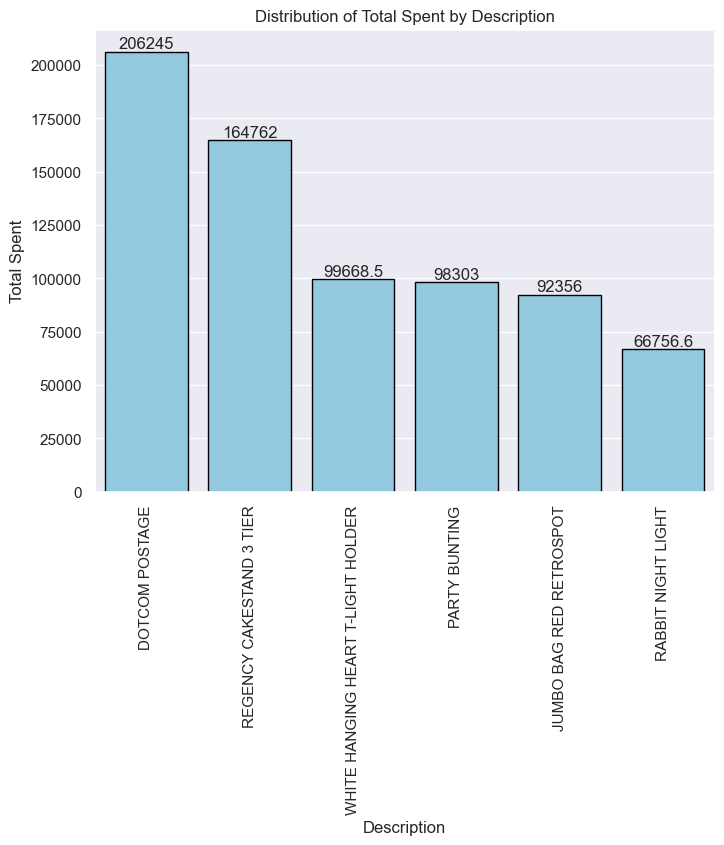

In [215]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax1 = sns.barplot(x = "Description", y = "TotalSpent", data = a, color = "skyblue", edgecolor = "black")

plt.xlabel("Description")
plt.ylabel("Total Spent")
plt.title("Distribution of Total Spent by Description")
plt.xticks(rotation=90)

ax1.bar_label(ax1.containers[0]);

In [216]:
a_heatmap = a.corr()
a_heatmap

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\1897448388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a_heatmap = a.corr()


,Quantity,TotalSpent
Quantity,1.000000,-0.811512
TotalSpent,-0.811512,1.000000


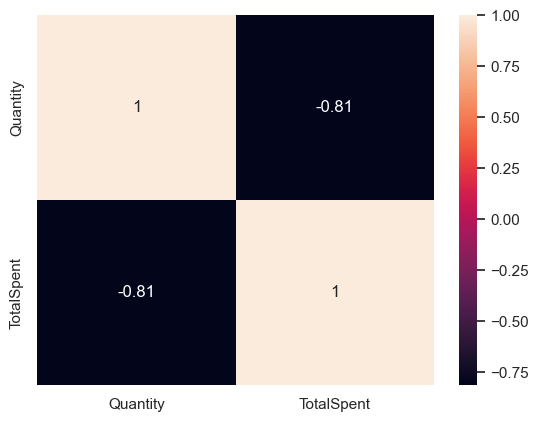

In [217]:
sns.heatmap(data = a_heatmap,
            annot = True);

In [218]:
# There is a strong negative relationship between the "Quantity" and "TotalSpent" columns (-0.811512). 
# This shows that as the quantity of the product increases, the total amount of expenditure decreases. This can be seen in 
# may be due to the fact that most of the company's customers are wholesalers.

**TASK 12: Which country spends the least?**

In [219]:
df.groupby("Country")["TotalSpent"].sum().sort_values(ascending = True).reset_index().head(5)

,Country,TotalSpent
0,Saudi Arabia,131.17
1,Bahrain,548.40
2,Czech Republic,707.72
3,RSA,1002.31
4,Brazil,1143.60


In [220]:
# According to the output, Saudi Arabia spends the least (£131,170).

**TASK 13: How many people living in Spain spend more than the average?**

In [221]:
df_spain = df[df["Country"] == "Spain"]
df_spain.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,115.5
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,12/3/2010 12:20,1.45,12557.0,Spain,2010-12-03 12:20:00,371,145.0
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,99.0
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,115.5
6425,536944,20728,LUNCH BAG CARS BLUE,100,12/3/2010 12:20,1.45,12557.0,Spain,2010-12-03 12:20:00,371,145.0


In [222]:
averages_for_spanish_customers = round(df_spain["TotalSpent"].mean(),2)
averages_for_spanish_customers
# average amount spent in Spain.

21.62

In [223]:
above_average_customers = df_spain[df_spain["TotalSpent"] > averages_for_spanish_customers]
above_average_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,115.5
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,12/3/2010 12:20,1.45,12557.0,Spain,2010-12-03 12:20:00,371,145.0
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,99.0
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,12/3/2010 12:20,1.65,12557.0,Spain,2010-12-03 12:20:00,371,115.5
6425,536944,20728,LUNCH BAG CARS BLUE,100,12/3/2010 12:20,1.45,12557.0,Spain,2010-12-03 12:20:00,371,145.0
...,...,...,...,...,...,...,...,...,...,...,...
495924,578339,47567B,TEA TIME KITCHEN APRON,6,11/24/2011 9:07,5.95,12421.0,Spain,2011-11-24 09:07:00,15,35.7
495926,578339,21907,I'M ON HOLIDAY METAL SIGN,12,11/24/2011 9:07,2.10,12421.0,Spain,2011-11-24 09:07:00,15,25.2
495928,578339,POST,POSTAGE,1,11/24/2011 9:07,28.00,12421.0,Spain,2011-11-24 09:07:00,15,28.0
531430,580955,21121,SET/10 RED POLKADOT PARTY CANDLES,24,12/6/2011 14:22,1.25,12442.0,Spain,2011-12-06 14:22:00,2,30.0


In [224]:
above_average_customers["CustomerID"].count()

503

In [225]:
above_average_customers["CustomerID"].nunique()

29

In [226]:
# A total of 29 unique customers spent above average.

**TASK 14: What is the total and average order amount per person?**

In [227]:
round(df.groupby("CustomerID")["TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False),1)

,CustomerID,TotalSpent
1703,14646.0,279489.0
4233,18102.0,256438.5
3758,17450.0,187482.2
1895,14911.0,132572.6
55,12415.0,123725.4
...,...,...
125,12503.0,-1126.0
3870,17603.0,-1165.3
1384,14213.0,-1192.2
2236,15369.0,-1592.5


In [228]:
round(df.groupby("CustomerID")["TotalSpent"].mean().reset_index().sort_values("TotalSpent", ascending = False),2)

,CustomerID,TotalSpent
2103,15195.0,3861.00
603,13135.0,3096.00
4045,17846.0,2033.10
3096,16532.0,1687.20
2522,15749.0,1435.73
...,...,...
1384,14213.0,-238.44
619,13154.0,-611.86
125,12503.0,-1126.00
2236,15369.0,-1592.49


In [229]:
df[df['UnitPrice'] < 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,2011-08-12 14:51:00,118,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,2011-08-12 14:52:00,118,-11062.06


In [230]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,373,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,373,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010-12-01 10:24:00,373,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011-12-09 09:57:00,0,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011-12-09 10:28:00,0,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011-12-09 11:57:00,0,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011-12-09 11:58:00,0,-1.25


In [231]:
# As I mentioned at the beginning, there were - values in the data. Negativity in the unit price field 
# represents "Bad Debt adjustment" and the negativity in the amount field represents "returns".
# Here I will use the filter to see the net person-based amounts in the dataset.

In [232]:
round(
    df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0) & ~df["InvoiceNo"].str.startswith('C')]
    .groupby("CustomerID")["TotalSpent"]
    .sum()
    .reset_index()
    .sort_values("TotalSpent", ascending=False),1)

,CustomerID,TotalSpent
1689,14646.0,280206.0
4201,18102.0,259657.3
3728,17450.0,194550.8
3008,16446.0,168472.5
1879,14911.0,143825.1
...,...,...
3323,16878.0,13.3
4098,17956.0,12.8
3014,16454.0,6.9
1793,14792.0,6.2


In [233]:
round(
    df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0) & ~df["InvoiceNo"].str.startswith('C')]
    .groupby("CustomerID")["TotalSpent"]
    .mean()
    .reset_index()
    .sort_values("TotalSpent", ascending=False),1)

,CustomerID,TotalSpent
0,12346.0,77183.6
3008,16446.0,56157.5
2011,15098.0,13305.5
2502,15749.0,4453.4
2087,15195.0,3861.0
...,...,...
3590,17254.0,2.4
697,13271.0,2.3
990,13684.0,2.2
3995,17816.0,2.2


**TASK 15: What is the average number of orders per month? Visualize the result and comment.**

In [234]:
df["InvoiceDate2_Month"] = df["InvoiceDate2"].dt.month

In [235]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12


In [236]:
df_grouped_month = round(df.groupby("InvoiceDate2_Month")["Quantity"].mean().reset_index(),3)
df_grouped_month

# Monthly average order quantities are as in the output.

,InvoiceDate2_Month,Quantity
0,1,8.791
1,2,10.033
2,3,9.575
3,4,9.664
4,5,10.273
5,6,9.265
6,7,9.897
7,8,11.512
8,9,10.947
9,10,9.393


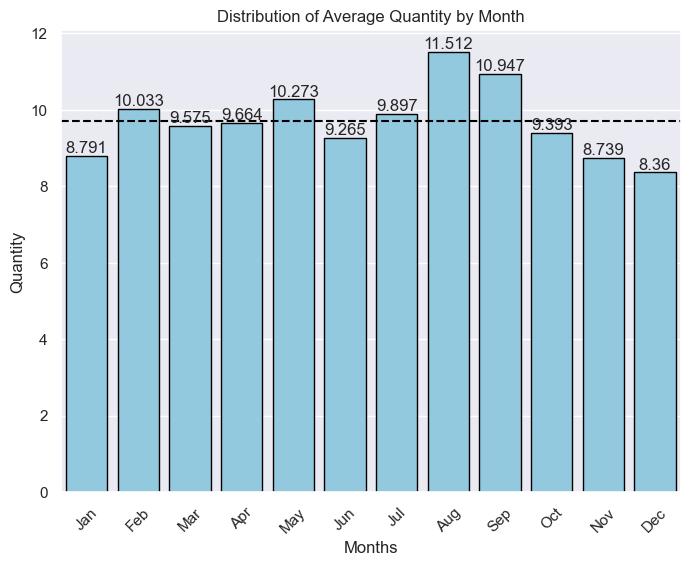

In [237]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

axx = sns.barplot(x = "InvoiceDate2_Month", y = "Quantity", data = df_grouped_month, color = "skyblue", edgecolor = "black")

plt.xlabel("Months")
plt.ylabel("Quantity")
plt.title("Distribution of Average Quantity by Month")
plt.xticks(rotation=45)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axx.set_xticklabels(month_names)


mean = df_grouped_month["Quantity"].mean()
axx.axhline(mean, color="black", linestyle="--")

# mean = 9.7040
# I added it to show regions below the monthly quantity average.

axx.bar_label(axx.containers[0]);

In [238]:
# As can be seen from the visual, monthly average orders decreased towards the end of the year. Product based 
# may be due to a seasonal effect. Campaigns towards the end of the year (such as Black Friday) 
# It can be foreseen to be increased for products that have decreased on average. For orders placed until August, the average order 
# amount remains stable on average. It would be more logical and appropriate to take actions in the 2nd half of the year.

**TASK 16: How to pull date values from InvoiceDate2 as DAY-MON-YEAR?**

In [239]:
df["Date"] = df["InvoiceDate2"].dt.strftime("%d/%m/%Y")

In [240]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010


**TASK 17: In which month were the most expenditures made? Visualize.**

In [241]:
df_total_spent_by_month = round(
        df.groupby("InvoiceDate2_Month")["TotalSpent"].sum().reset_index().sort_values("TotalSpent", ascending = False)
                            ,1)

df_total_spent_by_month

,InvoiceDate2_Month,TotalSpent
10,11,1461756.2
11,12,1182625.0
9,10,1070704.7
8,9,1019687.6
4,5,723333.5
5,6,691123.1
2,3,683267.1
7,8,682680.5
6,7,681300.1
0,1,560000.3


C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\4056081562.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.set_xticklabels(month_names);


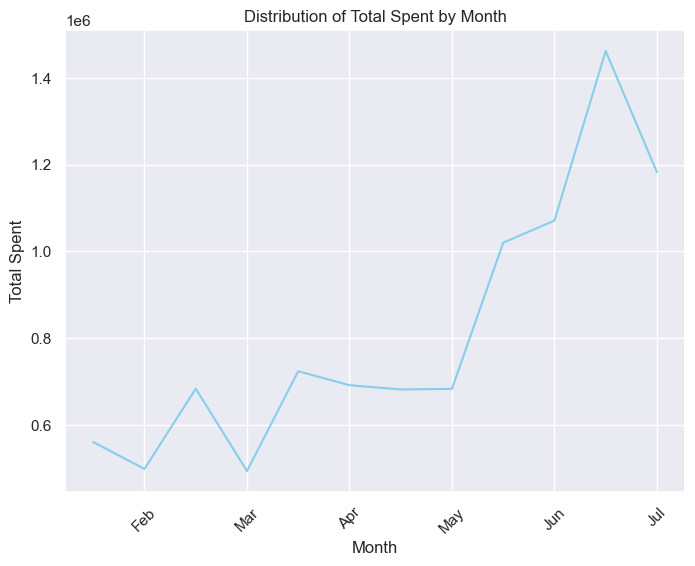

In [242]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax_3 = sns.lineplot(data=df_total_spent_by_month, x="InvoiceDate2_Month", y="TotalSpent", color = "skyblue");

plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.title("Distribution of Total Spent by Month")
plt.xticks(rotation=45)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax_3.set_xticklabels(month_names);


# Line plot; 

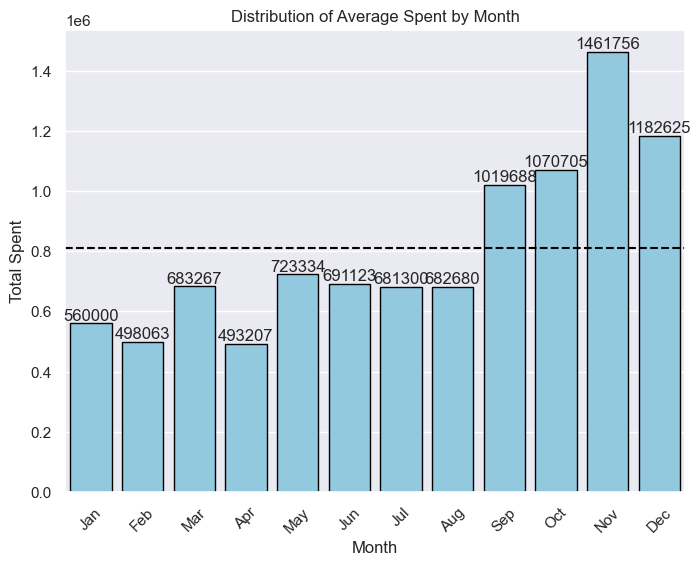

In [243]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax4 = sns.barplot(x = "InvoiceDate2_Month", y = "TotalSpent", data = df_total_spent_by_month, color = "skyblue", edgecolor = "black")

plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.title("Distribution of Average Spent by Month")
plt.xticks(rotation=45)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax4.set_xticklabels(month_names)

mean2 = df_total_spent_by_month["TotalSpent"].mean()
ax4.axhline(mean2, color="black", linestyle="--")

ax4.bar_label(ax4.containers[0], fmt="%.0f");

# Barplot;

In [244]:
# The highest expenditure occurred in November.
# When looking at the distribution of monthly total expenditures,
# Since August, the average spending has exceeded the overall average spending.
# Expenditures in the first half of the year remained below average and lagged behind other months.
# Orders and products sold during these months can be compensated for by offering specific campaigns and discounts.
# Looking at the monthly average orders, August has the highest value, while total expenditure remained below average. 
# In the other months of the second half of the year, total expenditures increase while average orders decrease.
# This indicates a correlation between total spending and quantity, explaining the relationship.

**TASK 18: Find the discrete values for the product price and extract them from the data. Then show it with visualization.**

In [245]:
filtered_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


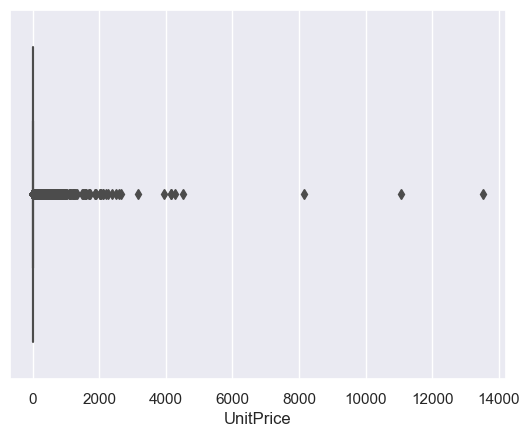

In [246]:
sns.boxplot(x=filtered_df["UnitPrice"]);



In [247]:
# The reason for using the filtered data frame is due to the fact that in some tasks within the analysis, 
# having negative values for quantity and unit price could lead to misleading results. 
# I took this into consideration while handling outliers.

In [248]:
Q1 = np.percentile(filtered_df.UnitPrice, 25)
Q1

1.25

In [249]:
Q3 = np.percentile(filtered_df.UnitPrice, 75)
Q3

4.13

In [250]:
# We have identified the 1st and 3rd quarters in the unit price column in our data.
# To find our quarters gap we need to do Q3-Q1.

In [251]:
IQR = Q3-Q1
IQR

2.88

In [252]:
# DETERMINING UPPER AND LOWER LIMITS;

# Since it is necessary not to go beyond the specified area in some sector data while determining IQR 
# IQR multiplier can be set low or high according to other specified values.
# Since the data is shopping data, 1.5*IQR can be used.

In [253]:
upper_lim = Q3 + 1.5*IQR
upper_lim

8.45

In [254]:
low_lim = Q1 - 1.5*IQR
low_lim

-3.0700000000000003

In [255]:
# Values above 8.45 and below -3.07 are outliers. UnitPrice cannot take a negative value.

In [256]:
filtered_df[  ( upper_lim  < filtered_df.UnitPrice )  |  ( low_lim > filtered_df.UnitPrice )  ]    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,12/9/2011 12:16,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,12/9/2011 12:16,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,12/9/2011 12:19,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,12/9/2011 12:20,9.95,12748.0,United Kingdom


In [257]:
# We filtered the fields of unit prices above the upper limit and below the lower 
# limit in filtered_data and 37,999 rows of fields are included in outliers.

In [258]:
outliers = filtered_df[  ( upper_lim  < filtered_df.UnitPrice )  |  ( low_lim > filtered_df.UnitPrice )  ]      
outliers.index

Int64Index([    16,     45,     65,    151,    152,    153,    163,    167,
               168,    173,
            ...
            541752, 541753, 541762, 541763, 541767, 541768, 541786, 541831,
            541849, 541892],
           dtype='int64', length=37999)

In [259]:
# To discard outliers, we made an assignment and obtained the index numbers

In [260]:
filtered_data_for_unit_price = filtered_df.drop(outliers.index, inplace = True)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\3137841789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_for_unit_price = filtered_df.drop(outliers.index, inplace = True)


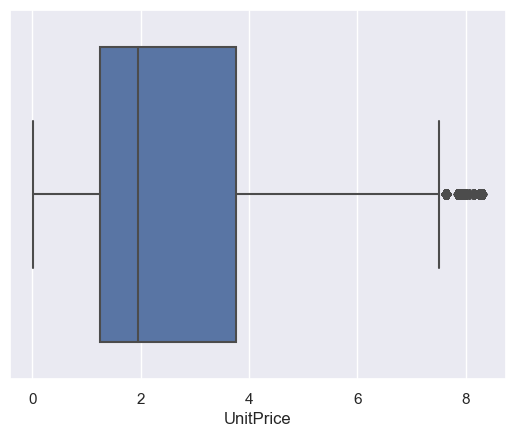

In [261]:
sns.boxplot(x=filtered_df["UnitPrice"]);

In [262]:
filtered_df.describe()

,Quantity,UnitPrice,CustomerID
count,492105.000000,492105.000000,375187.000000
mean,11.148015,2.531873,15306.779446
std,161.387532,1.913865,1710.647733
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,4.000000,1.950000,15187.000000
75%,12.000000,3.750000,16808.000000
max,80995.000000,8.330000,18287.000000


In [263]:
# As a result, we removed outliers from the unit price column in the dataset and examined it in detail through 
# visualization. Removing outliers using interquartile range is a statistical method. 
# Doing this ensures that other analyses conducted on the dataset yield more accurate results.

**TASK 19: What is the percentage of canceled transactions within the total transactions? Which products have the highest number of canceled transactions?**

In [264]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010


In [265]:
cancelled_transactions = df[df["InvoiceNo"].str.startswith('C')]
cancelled_transactions.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,373,-27.50,12,01/12/2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,373,-4.65,12,01/12/2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010-12-01 10:24:00,373,-19.80,12,01/12/2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96,12,01/12/2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96,12,01/12/2010


In [266]:
num_rows_cancelled = cancelled_transactions.shape[0]
print("number of canceled transactions:", num_rows_cancelled)

number of canceled transactions: 9288


In [267]:
total_transactions = df.shape[0]
total_transactions

541909

In [268]:
cancellation_rate = num_rows_cancelled / total_transactions * 100 
print("ratio of cancelled transactions:", round(cancellation_rate,2), "%")

ratio of cancelled transactions: 1.71 %


In [269]:
quantity_of_canceled_products = abs(cancelled_transactions["Quantity"].sum())
quantity_of_canceled_products

277574

In [270]:
total_quantity_of_products_sold = df["Quantity"].sum()
total_quantity_of_products_sold

5176450

In [271]:
ratio_of_canceled_product_quantity = quantity_of_canceled_products/total_quantity_of_products_sold * 100
print("ratio_of_canceled_product_quantity:", round(ratio_of_canceled_product_quantity,2), "%")

ratio_of_canceled_product_quantity: 5.36 %


**TASK 20: Which days have the highest sales? During which time intervals have the highest number of transactions occurred?**

In [272]:
df["SaleDay"] = df["InvoiceDate2"].dt.date

In [273]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01


In [274]:
most_sales_days = df["SaleDay"].value_counts().head(5)
most_sales_days

2011-12-05    5331
2011-12-08    4940
2011-11-29    4313
2011-11-16    4195
2011-11-11    4089
Name: SaleDay, dtype: int64

In [275]:
df["SaleHour"] = df["InvoiceDate2"].dt.hour  
most_active_hours = df["SaleHour"].value_counts().head(5)  
most_active_hours

12    78709
15    77519
13    72259
14    67471
11    57674
Name: SaleHour, dtype: int64

In [276]:
# The given dates belong to the later months of the year, specifically November and December. 
# These months typically coincide with the holiday season, special campaigns, and increased consumer spending. 
# Factors such as holiday shopping, discounts, and festivals contribute to businesses experiencing higher 
# sales volumes during this period. This could provide a plausible explanation for the increased sales on these dates.
# For instance, holidays such as Christmas and New Year's usually align with the year-end period. 
# During this time, people engage in gift shopping and take advantage of special campaigns and discounts. 
# As a result, businesses often experience higher sales volumes during the year-end holiday season.

**TASK 21: How many different products are typically sold in a single transaction?**

In [277]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8


In [278]:
df.groupby("InvoiceNo")["Quantity"].sum().reset_index().sort_values("Quantity", ascending = False).head(5)

,InvoiceNo,Quantity
22025,581483,80995
2303,541431,74215
9951,556917,15049
12983,563076,14730
18776,574941,14149


In [279]:
df[df["InvoiceNo"] == "581483"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09 09:15:00,0,168469.6,12,09/12/2011,2011-12-09,9


In [280]:
df[df["InvoiceNo"] == "541431"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,325,77183.6,1,18/01/2011,2011-01-18,10


In [281]:
df[df["InvoiceNo"] == "556917"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
228154,556917,21992,VINTAGE PAISLEY STATIONERY SET,12,6/15/2011 13:37,1.25,12415.0,Australia,2011-06-15 13:37:00,176,15.0,6,15/06/2011,2011-06-15,13
228155,556917,21993,FLORAL FOLK STATIONERY SET,60,6/15/2011 13:37,1.25,12415.0,Australia,2011-06-15 13:37:00,176,75.0,6,15/06/2011,2011-06-15,13
228156,556917,21933,PINK VINTAGE PAISLEY PICNIC BAG,100,6/15/2011 13:37,1.65,12415.0,Australia,2011-06-15 13:37:00,176,165.0,6,15/06/2011,2011-06-15,13
228157,556917,21990,MODERN FLORAL STATIONERY SET,72,6/15/2011 13:37,1.25,12415.0,Australia,2011-06-15 13:37:00,176,90.0,6,15/06/2011,2011-06-15,13
228158,556917,84944,SET OF 6 KASHMIR FOLKART BAUBLES,60,6/15/2011 13:37,1.65,12415.0,Australia,2011-06-15 13:37:00,176,99.0,6,15/06/2011,2011-06-15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228287,556917,22360,GLASS JAR ENGLISH CONFECTIONERY,96,6/15/2011 13:37,2.55,12415.0,Australia,2011-06-15 13:37:00,176,244.8,6,15/06/2011,2011-06-15,13
228288,556917,22364,GLASS JAR DIGESTIVE BISCUITS,24,6/15/2011 13:37,2.55,12415.0,Australia,2011-06-15 13:37:00,176,61.2,6,15/06/2011,2011-06-15,13
228289,556917,22363,GLASS JAR MARMALADE,24,6/15/2011 13:37,2.55,12415.0,Australia,2011-06-15 13:37:00,176,61.2,6,15/06/2011,2011-06-15,13
228290,556917,21115,ROSE CARAVAN DOORSTOP,16,6/15/2011 13:37,5.95,12415.0,Australia,2011-06-15 13:37:00,176,95.2,6,15/06/2011,2011-06-15,13


In [282]:
df[df["InvoiceNo"] == "563076"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
298957,563076,22795,SWEETHEART RECIPE BOOK STAND,16,8/11/2011 16:12,5.95,14646.0,Netherlands,2011-08-11 16:12:00,119,95.20,8,11/08/2011,2011-08-11,16
298958,563076,23176,ABC TREASURE BOOK BOX,72,8/11/2011 16:12,1.95,14646.0,Netherlands,2011-08-11 16:12:00,119,140.40,8,11/08/2011,2011-08-11,16
298959,563076,22399,MAGNETS PACK OF 4 CHILDHOOD MEMORY,108,8/11/2011 16:12,1.06,14646.0,Netherlands,2011-08-11 16:12:00,119,114.48,8,11/08/2011,2011-08-11,16
298960,563076,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,384,8/11/2011 16:12,1.25,14646.0,Netherlands,2011-08-11 16:12:00,119,480.00,8,11/08/2011,2011-08-11,16
298961,563076,23270,SET OF 2 CERAMIC PAINTED HEARTS,192,8/11/2011 16:12,1.25,14646.0,Netherlands,2011-08-11 16:12:00,119,240.00,8,11/08/2011,2011-08-11,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299071,563076,22027,TEA PARTY BIRTHDAY CARD,72,8/11/2011 16:12,0.36,14646.0,Netherlands,2011-08-11 16:12:00,119,25.92,8,11/08/2011,2011-08-11,16
299072,563076,22029,SPACEBOY BIRTHDAY CARD,72,8/11/2011 16:12,0.36,14646.0,Netherlands,2011-08-11 16:12:00,119,25.92,8,11/08/2011,2011-08-11,16
299073,563076,22037,ROBOT BIRTHDAY CARD,72,8/11/2011 16:12,0.36,14646.0,Netherlands,2011-08-11 16:12:00,119,25.92,8,11/08/2011,2011-08-11,16
299074,563076,22712,CARD DOLLY GIRL,144,8/11/2011 16:12,0.36,14646.0,Netherlands,2011-08-11 16:12:00,119,51.84,8,11/08/2011,2011-08-11,16


In [283]:
df[df["InvoiceNo"] == "574941"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
446951,574941,23582,VINTAGE DOILY JUMBO BAG RED,147,11/7/2011 17:42,4.95,NaN,United Kingdom,2011-11-07 17:42:00,31,727.65,11,07/11/2011,2011-11-07,17
446952,574941,23581,JUMBO BAG PAISLEY PARK,314,11/7/2011 17:42,4.95,NaN,United Kingdom,2011-11-07 17:42:00,31,1554.30,11,07/11/2011,2011-11-07,17
446953,574941,23570,TRADITIONAL PICK UP STICKS GAME,384,11/7/2011 17:42,2.95,NaN,United Kingdom,2011-11-07 17:42:00,31,1132.80,11,07/11/2011,2011-11-07,17
446954,574941,23571,TRADITIONAL NAUGHTS & CROSSES,370,11/7/2011 17:42,3.95,NaN,United Kingdom,2011-11-07 17:42:00,31,1461.50,11,07/11/2011,2011-11-07,17
446955,574941,23551,PACK OF 12 PAISLEY PARK TISSUES,64,11/7/2011 17:42,1.00,NaN,United Kingdom,2011-11-07 17:42:00,31,64.00,11,07/11/2011,2011-11-07,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447047,574941,20971,PINK BLUE FELT CRAFT TRINKET BOX,242,11/7/2011 17:42,2.95,NaN,United Kingdom,2011-11-07 17:42:00,31,713.90,11,07/11/2011,2011-11-07,17
447048,574941,84978,HANGING HEART JAR T-LIGHT HOLDER,140,11/7/2011 17:42,2.95,NaN,United Kingdom,2011-11-07 17:42:00,31,413.00,11,07/11/2011,2011-11-07,17
447049,574941,84946,ANTIQUE SILVER T-LIGHT GLASS,168,11/7/2011 17:42,2.95,NaN,United Kingdom,2011-11-07 17:42:00,31,495.60,11,07/11/2011,2011-11-07,17
447050,574941,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,236,11/7/2011 17:42,5.95,NaN,United Kingdom,2011-11-07 17:42:00,31,1404.20,11,07/11/2011,2011-11-07,17


In [284]:
# We have observed the total transaction count, which represents the quantities sold or returned, 
# based on the invoice numbers. Invoice number '581483' stands out with the highest count of 80995 units, 
# and the product content is a 'handmade paper bird'.

In [285]:
df.groupby("Description")["Quantity"].sum().reset_index().sort_values("Quantity", ascending = False).head(5)

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039


In [286]:
# In a transaction based on sold products, when we sum up the sold product quantities, the item named 
# 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' has made a total of 53847 units in sales.

In [287]:
df.groupby("InvoiceNo")["Description"].nunique().sort_values(ascending = False).reset_index().head(5)

,InvoiceNo,Description
0,573585,1108
1,581219,749
2,581492,731
3,580729,721
4,558475,703


In [288]:
df[df["InvoiceNo"] == "573585"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,10/31/2011 14:41,3.29,NaN,United Kingdom,2011-10-31 14:41:00,38,6.58,10,31/10/2011,2011-10-31,14
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,10/31/2011 14:41,1.63,NaN,United Kingdom,2011-10-31 14:41:00,38,24.45,10,31/10/2011,2011-10-31,14
430239,573585,15039,SANDALWOOD FAN,15,10/31/2011 14:41,1.63,NaN,United Kingdom,2011-10-31 14:41:00,38,24.45,10,31/10/2011,2011-10-31,14
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,10/31/2011 14:41,12.46,NaN,United Kingdom,2011-10-31 14:41:00,38,12.46,10,31/10/2011,2011-10-31,14
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,10/31/2011 14:41,12.46,NaN,United Kingdom,2011-10-31 14:41:00,38,12.46,10,31/10/2011,2011-10-31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,10/31/2011 14:41,2.07,NaN,United Kingdom,2011-10-31 14:41:00,38,6.21,10,31/10/2011,2011-10-31,14
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,10/31/2011 14:41,0.83,NaN,United Kingdom,2011-10-31 14:41:00,38,0.83,10,31/10/2011,2011-10-31,14
431348,573585,DOT,DOTCOM POSTAGE,1,10/31/2011 14:41,2019.05,NaN,United Kingdom,2011-10-31 14:41:00,38,2019.05,10,31/10/2011,2011-10-31,14
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,10/31/2011 14:41,16.67,NaN,United Kingdom,2011-10-31 14:41:00,38,16.67,10,31/10/2011,2011-10-31,14


In [289]:
# We have listed different products within each product invoice. Invoice number '573585' contains 1108 unique products sold.

**TASK 22: What is the monthly revenue trend? In which months was higher revenue generated? Please illustrate this with a pie chart.**

In [290]:
df_total_spent_by_month

,InvoiceDate2_Month,TotalSpent
10,11,1461756.2
11,12,1182625.0
9,10,1070704.7
8,9,1019687.6
4,5,723333.5
5,6,691123.1
2,3,683267.1
7,8,682680.5
6,7,681300.1
0,1,560000.3


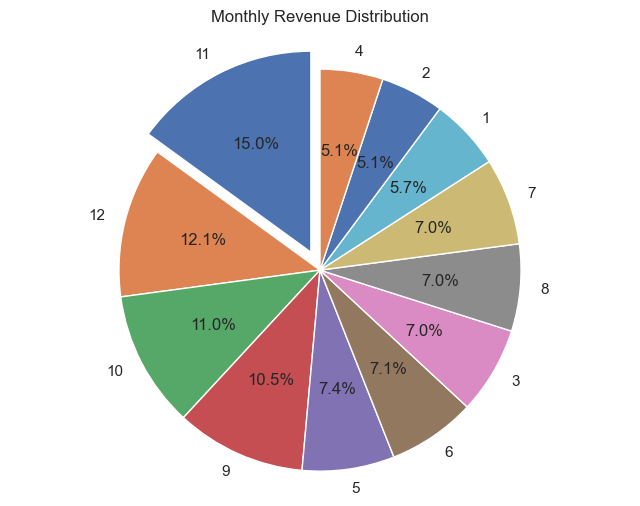

In [291]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

explode = (0.1, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0)  # To highlight the largest slice
plt.pie(
    df_total_spent_by_month["TotalSpent"],
    labels=df_total_spent_by_month["InvoiceDate2_Month"],
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Monthly Revenue Distribution')
plt.show()


**TASK 23: Who are the most valuable customers? Sort the customers based on the total spending amount and segment them.**

In [292]:
# In this question, I added the expenditure field to our filtered data, and I will perform segmentation 
# based on this field. Even if the customers in the data make returns, they have ultimately made a spending amount.

In [293]:
filtered_df["TotalSpent2"] = filtered_df["UnitPrice"] * filtered_df["Quantity"]

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\3857755331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["TotalSpent2"] = filtered_df["UnitPrice"] * filtered_df["Quantity"]


In [294]:
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [295]:
df_vis_total_spent = filtered_df.groupby("CustomerID")["TotalSpent2"].sum().reset_index()
df_vis_total_spent

,CustomerID,TotalSpent2
0,12346.0,77183.60
1,12347.0,4078.95
2,12348.0,1437.24
3,12349.0,1287.15
4,12350.0,294.40
...,...,...
4306,18280.0,160.70
4307,18281.0,46.92
4308,18282.0,127.05
4309,18283.0,2051.98


In [296]:
filtered_df.groupby("CustomerID")["TotalSpent2"].sum().describe()

count      4311.000000
mean       1843.043678
std        8266.216538
min           3.750000
25%         267.345000
50%         601.890000
75%        1499.245000
max      266194.220000
Name: TotalSpent2, dtype: float64

In [297]:
def segment_customers(total_spent):
    if total_spent <= 100:  
        return 'Customers1'
    elif total_spent <= 1000:
        return 'Customers2'
    elif total_spent <= 2000:
        return 'Customers3'
    elif total_spent <= 6000:  
        return 'Customers4'
    elif total_spent <= 10000:  
        return 'Customers5'
    elif total_spent <= 30000: 
        return 'Customers6'
    else:
        return 'Customers7'

filtered_df["CustomerSegment"] = filtered_df["TotalSpent2"].apply(segment_customers)

print(filtered_df["CustomerSegment"].value_counts())

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\2161257723.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["CustomerSegment"] = filtered_df["TotalSpent2"].apply(segment_customers)


Customers1    481020
Customers2     10799
Customers3       202
Customers4        79
Customers5         3
Customers7         2
Name: CustomerSegment, dtype: int64


In [298]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent2,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,Customers1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1


In [299]:
round(filtered_df.groupby("CustomerSegment")["TotalSpent2"].sum().reset_index().sort_values("TotalSpent2", ascending = False),1)

,CustomerSegment,TotalSpent2
0,Customers1,6017549.7
1,Customers2,2261778.2
2,Customers3,271518.7
5,Customers7,245653.2
3,Customers4,231591.0
4,Customers5,20223.5


In [300]:
# The customers1 group was selected as the most valuable customer group with the highest total expenditure amount.

**TASK 24: How do product returns vary across customer segments?**

In [301]:
# In previous tasks we segmented customers over the filtered dataframe, but we did not do a segment on 
# the dataframe that we did not filter. Now let's do a segment operation in the actual dataframe.

In [302]:
def segment_customers(total_spent):
    if total_spent <= 100:  
        return 'Customers1'
    elif total_spent <= 1000:
        return 'Customers2'
    elif total_spent <= 2000:
        return 'Customers3'
    elif total_spent <= 6000:  
        return 'Customers4'
    elif total_spent <= 1000:  
        return 'Customers5'
    elif total_spent <= 30000: 
        return 'Customers6'
    else:
        return 'Customers7'

df["CustomerSegment"] = df["TotalSpent"].apply(segment_customers)

print(df["CustomerSegment"].value_counts())

Customers1    528355
Customers2     13166
Customers3       266
Customers4       113
Customers6         6
Customers7         3
Name: CustomerSegment, dtype: int64


In [303]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01,8,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1


In [304]:
df_cancelled_order = df[df["InvoiceNo"].str.startswith('C')]
df_cancelled_order.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,373,-27.50,12,01/12/2010,2010-12-01,9,Customers1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,373,-4.65,12,01/12/2010,2010-12-01,9,Customers1


In [305]:
cancelled_orders_by_segment = df_cancelled_order.groupby(["CustomerSegment", "InvoiceNo"]).size().reset_index(name="CancelledCount")
sorted_cancelled_orders = cancelled_orders_by_segment.sort_values(by="CancelledCount", ascending=False)
print(sorted_cancelled_orders)

     CustomerSegment InvoiceNo  CancelledCount
3048      Customers1   C570867             101
2156      Customers1   C560540              57
1106      Customers1   C548460              45
2188      Customers1   C560855              41
138       Customers1   C538341              39
...              ...       ...             ...
1647      Customers1   C554793               1
1648      Customers1   C554846               1
1652      Customers1   C554851               1
1654      Customers1   C554862               1
1918      Customers1   C557709               1

[3836 rows x 3 columns]


In [306]:
# According to the output, only customer group customer1 had returns and 
# invoice number C570867 contains the highest number of returns.

**TASK 25: Which products have the highest number of transaction cancelations and refunds?**

In [307]:
df_cancelled_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,373,-27.50,12,01/12/2010,2010-12-01,9,Customers1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,373,-4.65,12,01/12/2010,2010-12-01,9,Customers1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010-12-01 10:24:00,373,-19.80,12,01/12/2010,2010-12-01,10,Customers1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96,12,01/12/2010,2010-12-01,10,Customers1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,373,-6.96,12,01/12/2010,2010-12-01,10,Customers1


In [308]:
df_cancelled_order.groupby("Description")["Quantity"].sum().sort_values(ascending = True).head(10).reset_index()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",-80995
1,MEDIUM CERAMIC TOP STORAGE JAR,-74494
2,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
3,Manual,-4066
4,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
5,PINK BLUE FELT CRAFT TRINKET BOX,-2617
6,WHITE HANGING HEART T-LIGHT HOLDER,-2578
7,GIN + TONIC DIET METAL SIGN,-2030
8,HERB MARKER BASIL,-1527
9,FELTCRAFT DOLL MOLLY,-1447


**TASK 26: How do customer preferences vary based on price ranges of products? Which price ranges are more popular for sold products?**

In [309]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent2,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,Customers1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,Customers1


In [310]:
filtered_df.UnitPrice.describe()

count    492105.000000
mean          2.531873
std           1.913865
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.330000
Name: UnitPrice, dtype: float64

In [311]:
def segment_price(unit_price):
    if unit_price >= 0 and unit_price <= 2:  
        return "cheap_price"
    elif unit_price > 2 and unit_price <= 5:  
        return "medium_price"
    elif unit_price > 5 and unit_price <= 7:
        return "expensive_price"
    elif unit_price > 7 and unit_price <= 9: 
        return "very_expensive_price"

filtered_df["UnitPriceSegment"] = filtered_df["UnitPrice"].apply(segment_price)

print(filtered_df["UnitPriceSegment"].value_counts())


cheap_price             249363
medium_price            195153
expensive_price          25956
very_expensive_price     21633
Name: UnitPriceSegment, dtype: int64


C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\1852455178.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["UnitPriceSegment"] = filtered_df["UnitPrice"].apply(segment_price)


In [341]:
filtered_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent2,CustomerSegment,UnitPriceSegment
353613,567818,21744,SNOWFLAKE PORTABLE TABLE LIGHT,1,9/22/2011 12:41,2.95,14395.0,United Kingdom,2.95,Customers1,medium_price
444176,574721,23474,WOODLAND SMALL BLUE FELT HEART,2,11/6/2011 14:43,0.83,17920.0,United Kingdom,1.66,Customers1,cheap_price
473362,576830,85170D,SET/6 PINK BIRD T-LIGHT CANDLES,1,11/16/2011 14:54,2.10,14898.0,United Kingdom,2.10,Customers1,medium_price
18590,537823,20972,PINK CREAM FELT CRAFT TRINKET BOX,1,12/8/2010 14:25,2.51,NaN,United Kingdom,2.51,Customers1,medium_price
439839,574481,22623,BOX OF VINTAGE JIGSAW BLOCKS,1,11/4/2011 12:45,5.95,18022.0,United Kingdom,5.95,Customers1,expensive_price


In [313]:
filtered_df.groupby("UnitPriceSegment")["CustomerID"].nunique().reset_index().sort_values(by = "CustomerID", ascending = False)

,UnitPriceSegment,CustomerID
0,cheap_price,4163
2,medium_price,4103
1,expensive_price,2744
3,very_expensive_price,2344


In [314]:
filtered_df.groupby("UnitPriceSegment")["CustomerID"].count().reset_index().sort_values(by = "CustomerID", ascending = False)

,UnitPriceSegment,CustomerID
0,cheap_price,210795
2,medium_price,135922
1,expensive_price,15559
3,very_expensive_price,12911


**TASK 27: How do holidays or special occasions (such as Christmas, New Year's, etc.) impact sales? Which products are in higher demand during these periods?**

In [315]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01,8,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010,2010-12-01,8,Customers1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1


In [316]:
special_dates = ["01/01/2010", "14/02/2010", "08/05/2010", "19/06/2010", "31/10/2010", "25/12/2010",
                 "01/01/2011", "14/02/2011", "08/05/2011", "19/06/2011", "31/10/2011", "25/12/2011"]

special_dates_dataset = df[df["Date"].isin(special_dates)]

In [317]:
special_dates_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
88847,543821,22926,IVORY GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2011-02-14 09:24:00,298,11.90,2,14/02/2011,2011-02-14,9,Customers1
88848,543821,22928,YELLOW GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2011-02-14 09:24:00,298,11.90,2,14/02/2011,2011-02-14,9,Customers1
88849,543821,22925,BLUE GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2011-02-14 09:24:00,298,11.90,2,14/02/2011,2011-02-14,9,Customers1
88850,543821,85175,CACTI T-LIGHT CANDLES,16,2/14/2011 9:24,0.42,17667.0,United Kingdom,2011-02-14 09:24:00,298,6.72,2,14/02/2011,2011-02-14,9,Customers1
88851,543821,22456,NATURAL SLATE CHALKBOARD LARGE,3,2/14/2011 9:24,4.95,17667.0,United Kingdom,2011-02-14 09:24:00,298,14.85,2,14/02/2011,2011-02-14,9,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431668,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,10/31/2011 17:13,9.95,15023.0,United Kingdom,2011-10-31 17:13:00,38,19.90,10,31/10/2011,2011-10-31,17,Customers1
431669,573695,23543,WALL ART KEEP CALM,1,10/31/2011 17:13,8.25,15023.0,United Kingdom,2011-10-31 17:13:00,38,8.25,10,31/10/2011,2011-10-31,17,Customers1
431670,573695,23397,FOOT STOOL HOME SWEET HOME,4,10/31/2011 17:13,9.95,15023.0,United Kingdom,2011-10-31 17:13:00,38,39.80,10,31/10/2011,2011-10-31,17,Customers1
431671,573726,72817,check,-67,10/31/2011 17:18,0.00,NaN,United Kingdom,2011-10-31 17:18:00,38,-0.00,10,31/10/2011,2011-10-31,17,Customers1


In [318]:
special_vis = special_dates_dataset.groupby("Date")["Quantity"].sum().reset_index()
special_vis

,Date,Quantity
0,08/05/2011,10692
1,14/02/2011,13469
2,19/06/2011,15060
3,31/10/2011,4926


In [319]:
special_dates = [
    ('08/05/2011', 'Mother s Day'),
    ('14/02/2011', 'Valentine s Day'),
    ('19/06/2011', 'Father s Day'),
    ('31/10/2011', 'Halloween')
]

special_vis['SpecialDay'] = special_vis['Date'].replace(dict(special_dates))

In [320]:
special_vis

,Date,Quantity,SpecialDay
0,08/05/2011,10692,Mother s Day
1,14/02/2011,13469,Valentine s Day
2,19/06/2011,15060,Father s Day
3,31/10/2011,4926,Halloween


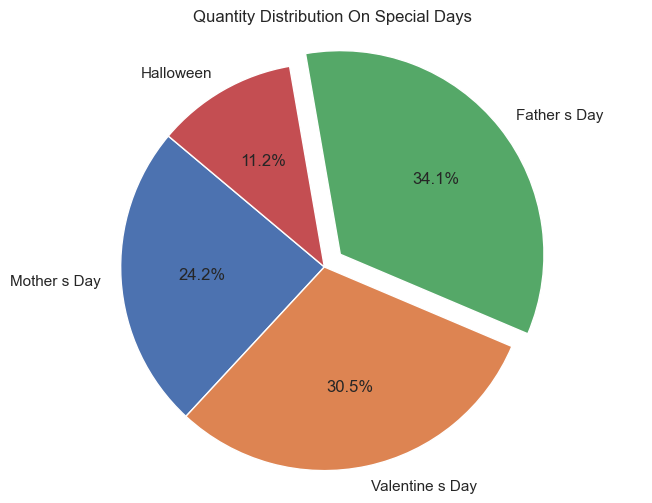

In [321]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

explode = (0, 0, 0.1, 0) 
plt.pie(
    special_vis["Quantity"],
    labels=special_vis["SpecialDay"],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
)
plt.axis('equal')
plt.title('Quantity Distribution On Special Days')
plt.show()

In [322]:
grouped_description = special_dates_dataset.groupby("Description")["Quantity"].sum().reset_index().sort_values(
    by = "Quantity", ascending = False).head(20)

grouped_description

,Description,Quantity
823,GROW A FLYTRAP OR SUNFLOWER IN TIN,1132
971,JUMBO BAG RED RETROSPOT,764
1838,SMALL CHINESE STYLE SCISSOR,612
127,ASSORTED COLOUR BIRD ORNAMENT,600
2101,WHITE HANGING HEART T-LIGHT HOLDER,507
1399,PLACE SETTING WHITE HEART,498
1447,RABBIT NIGHT LIGHT,411
1257,PACK OF 72 RETROSPOT CAKE CASES,391
969,JUMBO BAG PINK POLKADOT,390
959,JUMBO BAG BAROQUE BLACK WHITE,376


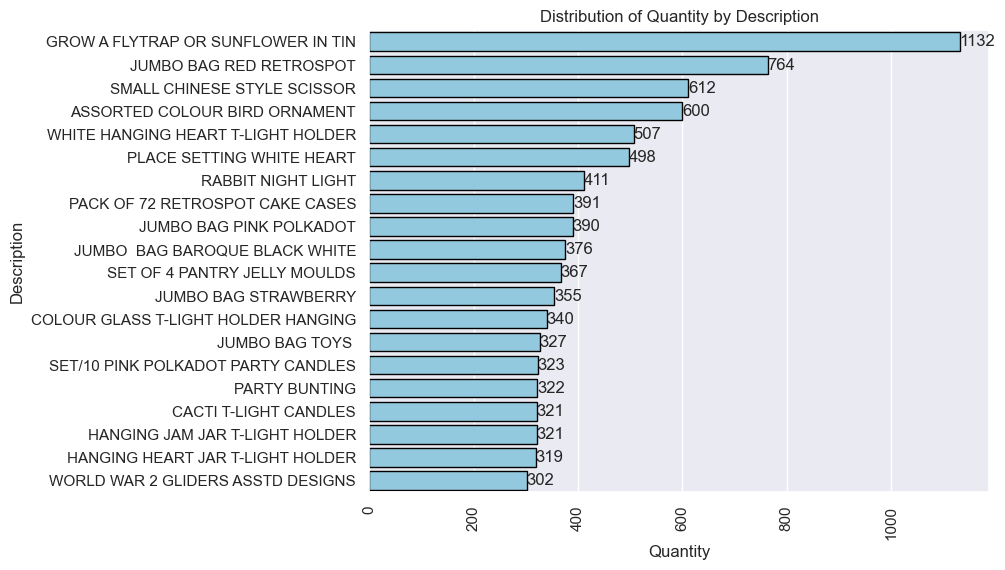

In [323]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax6 = sns.barplot(x = "Quantity", y = "Description", data = grouped_description, 
                  color = "skyblue", edgecolor = "black",)

plt.xlabel("Quantity")
plt.ylabel("Description")
plt.title("Distribution of Quantity by Description")
plt.xticks(rotation=90)

ax6.bar_label(ax6.containers[0], fmt="%.0f");

In [324]:
special_vis2 = special_dates_dataset.groupby("Date")["TotalSpent"].sum().reset_index().sort_values(
    by = "TotalSpent", ascending = False)
special_vis2

,Date,TotalSpent
3,31/10/2011,48475.45
1,14/02/2011,26222.03
2,19/06/2011,22360.01
0,08/05/2011,18808.92


In [325]:
special_dates2 = [
    ('08/05/2011', 'Mother s Day'),
    ('14/02/2011', 'Valentine s Day'),
    ('19/06/2011', 'Father s Day'),
    ('31/10/2011', 'Halloween')
]

special_vis2['SpecialDay'] = special_vis2['Date'].replace(dict(special_dates2))

In [326]:
special_vis2

,Date,TotalSpent,SpecialDay
3,31/10/2011,48475.45,Halloween
1,14/02/2011,26222.03,Valentine s Day
2,19/06/2011,22360.01,Father s Day
0,08/05/2011,18808.92,Mother s Day


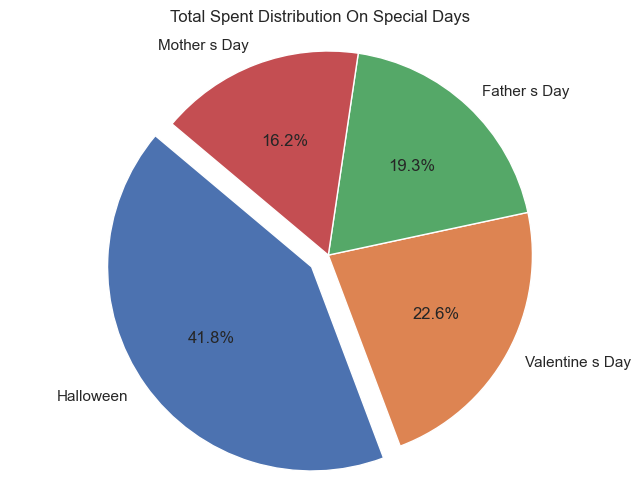

In [327]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

explode = (0.1, 0, 0, 0) 
plt.pie(
    special_vis2["TotalSpent"],
    labels=special_vis2["SpecialDay"],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
)
plt.axis('equal')
plt.title('Total Spent Distribution On Special Days')
plt.show()

**TASK 28: Which products are depleting faster based on the stock status and stock codes of the products? Is there a correlation between stock level and sales?**

In [328]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01,8,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010,2010-12-01,8,Customers1


In [329]:
df_filtered_grouped_stock_code = df[~df["InvoiceNo"].str.startswith('C') & df.UnitPrice > 0]
df_filtered_grouped_stock_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30,12,01/12/2010,2010-12-01,8,Customers1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00,12,01/12/2010,2010-12-01,8,Customers1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34,12,01/12/2010,2010-12-01,8,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,0,10.20,12,09/12/2011,2011-12-09,12,Customers1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,0,12.60,12,09/12/2011,2011-12-09,12,Customers1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,0,16.60,12,09/12/2011,2011-12-09,12,Customers1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,0,16.60,12,09/12/2011,2011-12-09,12,Customers1


In [330]:
stock_code_quantity = df_filtered_grouped_stock_code.groupby("StockCode")["Quantity"].sum().reset_index().sort_values(
                                                            by = "Quantity", ascending = False).head(5)
stock_code_quantity

,StockCode,Quantity
2465,23843,80995
2020,23166,78033
1109,22197,56921
2909,84077,55047
3387,85099B,48474


In [331]:
df_filtered_grouped_stock_code[df_filtered_grouped_stock_code["StockCode"] == "23843"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09 09:15:00,0,168469.6,12,09/12/2011,2011-12-09,9,Customers7


In [332]:
df_filtered_grouped_stock_code[df_filtered_grouped_stock_code["StockCode"] == "23166"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,325,77183.60,1,18/01/2011,2011-01-18,10,Customers7
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,5/12/2011 10:10,1.04,14646.0,Netherlands,2011-05-12 10:10:00,211,99.84,5,12/05/2011,2011-05-12,10,Customers1
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,5/12/2011 12:11,1.25,16745.0,United Kingdom,2011-05-12 12:11:00,211,5.00,5,12/05/2011,2011-05-12,12,Customers1
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,5/12/2011 16:29,1.25,14651.0,United Kingdom,2011-05-12 16:29:00,210,6.25,5,12/05/2011,2011-05-12,16,Customers1
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,5/12/2011 16:52,1.25,13601.0,United Kingdom,2011-05-12 16:52:00,210,3.75,5,12/05/2011,2011-05-12,16,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,12/7/2011 12:16,1.25,15984.0,United Kingdom,2011-12-07 12:16:00,2,2.50,12,07/12/2011,2011-12-07,12,Customers1
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,12/8/2011 9:28,2.46,NaN,United Kingdom,2011-12-08 09:28:00,1,2.46,12,08/12/2011,2011-12-08,9,Customers1
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,12/8/2011 16:30,2.46,NaN,United Kingdom,2011-12-08 16:30:00,0,4.92,12,08/12/2011,2011-12-08,16,Customers1
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,12/9/2011 8:48,1.04,12433.0,Norway,2011-12-09 08:48:00,0,49.92,12,09/12/2011,2011-12-09,8,Customers1


In [333]:
df_filtered_grouped_stock_code[df_filtered_grouped_stock_code["StockCode"] == "22197"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
221,536390,22197,SMALL POPCORN HOLDER,100,12/1/2010 10:19,0.72,17511.0,United Kingdom,2010-12-01 10:19:00,373,72.00,12,01/12/2010,2010-12-01,10,Customers1
393,536404,22197,SMALL POPCORN HOLDER,36,12/1/2010 11:29,0.85,16218.0,United Kingdom,2010-12-01 11:29:00,373,30.60,12,01/12/2010,2010-12-01,11,Customers1
532,536409,22197,SMALL POPCORN HOLDER,2,12/1/2010 11:45,0.85,17908.0,United Kingdom,2010-12-01 11:45:00,373,1.70,12,01/12/2010,2010-12-01,11,Customers1
610,536412,22197,SMALL POPCORN HOLDER,5,12/1/2010 11:49,0.85,17920.0,United Kingdom,2010-12-01 11:49:00,373,4.25,12,01/12/2010,2010-12-01,11,Customers1
804,536464,22197,SMALL POPCORN HOLDER,5,12/1/2010 12:23,0.85,17968.0,United Kingdom,2010-12-01 12:23:00,373,4.25,12,01/12/2010,2010-12-01,12,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540321,581476,22197,POPCORN HOLDER,100,12/9/2011 8:48,0.72,12433.0,Norway,2011-12-09 08:48:00,0,72.00,12,09/12/2011,2011-12-09,8,Customers1
540785,581492,22197,POPCORN HOLDER,34,12/9/2011 10:03,1.63,NaN,United Kingdom,2011-12-09 10:03:00,0,55.42,12,09/12/2011,2011-12-09,10,Customers1
541285,581497,22197,POPCORN HOLDER,68,12/9/2011 10:23,2.46,NaN,United Kingdom,2011-12-09 10:23:00,0,167.28,12,09/12/2011,2011-12-09,10,Customers2
541678,581538,22197,POPCORN HOLDER,4,12/9/2011 11:34,0.85,14446.0,United Kingdom,2011-12-09 11:34:00,0,3.40,12,09/12/2011,2011-12-09,11,Customers1


In [334]:
df_filtered_grouped_stock_code[df_filtered_grouped_stock_code["StockCode"] == "84077"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/2/2010 10:09,0.29,14047.0,United Kingdom,2010-12-02 10:09:00,372,13.92,12,02/12/2010,2010-12-02,10,Customers1
3297,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/2/2010 10:17,0.29,17017.0,United Kingdom,2010-12-02 10:17:00,372,13.92,12,02/12/2010,2010-12-02,10,Customers1
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,2010-12-02 17:38:00,371,518.40,12,02/12/2010,2010-12-02,17,Customers2
5047,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,12/2/2010 18:25,0.21,15093.0,United Kingdom,2010-12-02 18:25:00,371,60.48,12,02/12/2010,2010-12-02,18,Customers1
5278,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/3/2010 10:26,0.29,13370.0,United Kingdom,2010-12-03 10:26:00,371,13.92,12,03/12/2010,2010-12-03,10,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534797,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/7/2011 15:02,0.29,12615.0,France,2011-12-07 15:02:00,1,13.92,12,07/12/2011,2011-12-07,15,Customers1
538240,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/8/2011 13:46,0.29,13510.0,United Kingdom,2011-12-08 13:46:00,0,13.92,12,08/12/2011,2011-12-08,13,Customers1
538846,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,12/8/2011 15:03,0.21,15484.0,United Kingdom,2011-12-08 15:03:00,0,60.48,12,08/12/2011,2011-12-08,15,Customers1
540377,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/9/2011 8:59,0.29,17364.0,United Kingdom,2011-12-09 08:59:00,0,13.92,12,09/12/2011,2011-12-09,8,Customers1


In [335]:
df_filtered_grouped_stock_code[df_filtered_grouped_stock_code["StockCode"] == "85099B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 9:57,1.65,16029.0,United Kingdom,2010-12-01 09:57:00,373,165.00,12,01/12/2010,2010-12-01,9,Customers2
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 10:19,1.65,17511.0,United Kingdom,2010-12-01 10:19:00,373,165.00,12,01/12/2010,2010-12-01,10,Customers2
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/1/2010 11:45,1.95,17908.0,United Kingdom,2010-12-01 11:45:00,373,3.90,12,01/12/2010,2010-12-01,11,Customers1
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom,2010-12-01 12:23:00,373,1.95,12,01/12/2010,2010-12-01,12,Customers1
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:49,1.95,15012.0,United Kingdom,2010-12-01 12:49:00,373,1.95,12,01/12/2010,2010-12-01,12,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/8/2011 14:38,2.08,14415.0,United Kingdom,2011-12-08 14:38:00,0,6.24,12,08/12/2011,2011-12-08,14,Customers1
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/8/2011 15:23,2.08,15898.0,United Kingdom,2011-12-08 15:23:00,0,18.72,12,08/12/2011,2011-12-08,15,Customers1
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/8/2011 16:30,4.13,NaN,United Kingdom,2011-12-08 16:30:00,0,4.13,12,08/12/2011,2011-12-08,16,Customers1
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom,2011-12-09 09:38:00,0,20.80,12,09/12/2011,2011-12-09,9,Customers1


In [336]:
stock_code_quantity

,StockCode,Quantity
2465,23843,80995
2020,23166,78033
1109,22197,56921
2909,84077,55047
3387,85099B,48474


In [337]:
stock_code_quantity.merge(df, on="StockCode")

,StockCode,Quantity_x,InvoiceNo,Description,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,LastOrder,TotalSpent,InvoiceDate2_Month,Date,SaleDay,SaleHour,CustomerSegment
0,23843,80995,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09 09:15:00,0,168469.60,12,09/12/2011,2011-12-09,9,Customers7
1,23843,80995,C581484,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,2011-12-09 09:27:00,0,-168469.60,12,09/12/2011,2011-12-09,9,Customers1
2,23166,78033,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,325,77183.60,1,18/01/2011,2011-01-18,10,Customers7
3,23166,78033,C541433,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18 10:17:00,325,-77183.60,1,18/01/2011,2011-01-18,10,Customers1
4,23166,78033,552882,MEDIUM CERAMIC TOP STORAGE JAR,96,5/12/2011 10:10,1.04,14646.0,Netherlands,2011-05-12 10:10:00,211,99.84,5,12/05/2011,2011-05-12,10,Customers1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,85099B,48474,581412,JUMBO BAG RED RETROSPOT,3,12/8/2011 14:38,2.08,14415.0,United Kingdom,2011-12-08 14:38:00,0,6.24,12,08/12/2011,2011-12-08,14,Customers1
4435,85099B,48474,581421,JUMBO BAG RED RETROSPOT,9,12/8/2011 15:23,2.08,15898.0,United Kingdom,2011-12-08 15:23:00,0,18.72,12,08/12/2011,2011-12-08,15,Customers1
4436,85099B,48474,581439,JUMBO BAG RED RETROSPOT,1,12/8/2011 16:30,4.13,NaN,United Kingdom,2011-12-08 16:30:00,0,4.13,12,08/12/2011,2011-12-08,16,Customers1
4437,85099B,48474,581486,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom,2011-12-09 09:38:00,0,20.80,12,09/12/2011,2011-12-09,9,Customers1


In [338]:
stock_codes_of_interest = ["23843", "23166", "22197", "84077", "85099B"]
filtered_merged_df = stock_code_quantity.merge(df, on="StockCode")
filtered_merged_df = filtered_merged_df[filtered_merged_df["StockCode"].isin(stock_codes_of_interest)]

In [339]:
filtered_merged_df.corr()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_8532\1086437249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_merged_df.corr()


,Quantity_x,Quantity_y,UnitPrice,CustomerID,LastOrder,TotalSpent,InvoiceDate2_Month,SaleHour
Quantity_x,1.000000,0.000960,-0.423969,0.021346,-0.120274,-0.001736,0.102620,0.046243
Quantity_y,0.000960,1.000000,-0.009850,0.000977,-0.000129,0.950656,-0.000050,-0.002494
UnitPrice,-0.423969,-0.009850,1.000000,-0.029080,0.083606,-0.000712,-0.106161,0.107106
CustomerID,0.021346,0.000977,-0.029080,1.000000,-0.005217,0.000132,0.032203,0.046054
LastOrder,-0.120274,-0.000129,0.083606,-0.005217,1.000000,-0.000640,-0.619777,-0.004333
TotalSpent,-0.001736,0.950656,-0.000712,0.000132,-0.000640,1.000000,0.000108,-0.001267
InvoiceDate2_Month,0.102620,-0.000050,-0.106161,0.032203,-0.619777,0.000108,1.000000,0.040915
SaleHour,0.046243,-0.002494,0.107106,0.046054,-0.004333,-0.001267,0.040915,1.000000
